<a href="https://colab.research.google.com/github/RodrigoSchneiderbr/Machine_learning/blob/main/pratica_3_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
idade = [18,25,57,45,26,64,37,40,24,33]
salario_anual = [15000, 29000, 68000, 52000,32000,80000,41000,45000,26000,33000]

In [5]:
xData = np.array(idade)
yData = np.array(salario_anual)

In [6]:
def equacaolinear(x, a, b):
  return a * x + b

In [9]:
parametros_iniciais = np.array([1.0,1.0])

In [10]:
parametrosOtimizados, pcov = curve_fit(equacaolinear,xData, yData, parametros_iniciais)

In [11]:
parametrosOtimizados

array([ 1320.53256667, -6627.65171673])

In [13]:
previsaoModelo = equacaolinear(xData, *parametrosOtimizados)

In [14]:
previsaoModelo

array([17141.93448327, 26385.66244994, 68642.70458328, 52796.31378328,
       27706.19501661, 77886.43254995, 42232.05324995, 46193.65094995,
       25065.12988328, 36949.92298328])

In [15]:
erroAbsoluto = previsaoModelo - yData

In [16]:
SE = np.square(erroAbsoluto)
MSE = np.mean(SE)
print('SE:', SE)
print('MSE:', MSE)

SE: [ 4587883.33064101  6834760.82563804   413069.18137435   634115.64144357
 18436761.23538558  4467167.3659006   1517955.21070226  1424802.59030848
   873982.13514337 15601891.57382987]
MSE: 5479238.909036714


In [18]:
Rsquared = 1.0 - (np.var(erroAbsoluto) / np.var(yData))
print('Coeficiente de Determinação:',Rsquared)

Coeficiente de Determinação: 0.9846300347582353


In [19]:
print('Y = {}X {}'.format(parametrosOtimizados[0], parametrosOtimizados[1]))

Y = 1320.5325666669085X -6627.651716729711


Text(0, 0.5, 'salario_anual')

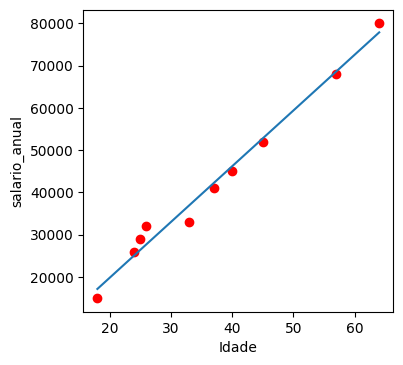

In [21]:
f = plt.figure(figsize=(4,4), dpi = 100)
axes = f.add_subplot(111)
axes.plot(xData,yData,'ro')

xModel = np.linspace(min(xData), max(xData))
yModel = equacaolinear(xModel, *parametrosOtimizados)

axes.plot(xModel, yModel)
plt.xlabel('Idade')
plt.ylabel('salario_anual')

AGORA VAMOS MOSTRAR COMO O MDESMO CÓDIGO FICARIA COM A UTILIZAÇÃO SKLEARN

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
reg = LinearRegression()
x_modeloSklearn = xData.reshape((-1,1))
regressao = reg.fit (x_modeloSklearn,yData)

In [25]:
previsao=reg.predict(x_modeloSklearn)

In [27]:
MSE = mean_squared_error(yData,previsao)
print('MSE :',MSE)

MSE : 5479238.909036706


In [28]:
print('Y = {}X {}'.format(reg.coef_, reg.intercept_))

Y = [1320.53256496]X -6627.651646877624


In [29]:
from sklearn.metrics import r2_score

In [30]:
R_2 = r2_score(yData, previsao)
print('Coeficiente de Determinação :',R_2)

Coeficiente de Determinação : 0.9846300347582353


In [31]:
import pandas as pd

In [33]:
data = pd.read_csv("headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [34]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [36]:
reg = LinearRegression()
x_Reshaped = x.reshape((-1,1))
regressao = reg.fit(x_Reshaped,y)

In [37]:
previsao = reg.predict(x_Reshaped)

In [45]:
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))
R2 = r2_score (y, previsao)
print('Coeficiente de determinação:',R2)

Y = [0.26342934]X 325.5734210494426
Coeficiente de determinação: 0.639311719957


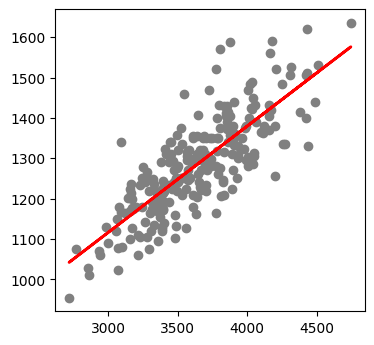

In [47]:
plt.figure(figsize = (4,4), dpi = 100)
plt.scatter(x,y, color = 'gray')
plt.plot(x,previsao, color = 'red', linewidth = 2)